# COPY THE ASSIGNMENT AND START SOLVING

Run the whole assignement and wherever there is a error due to a gap try to fill it and solve


# Convolutional Neural Networks (CNN)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [ ]:
# read train
train = pd.read_csv("/content/drive/MyDrive/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# read test
test= pd.read_csv("/content/drive/MyDrive/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


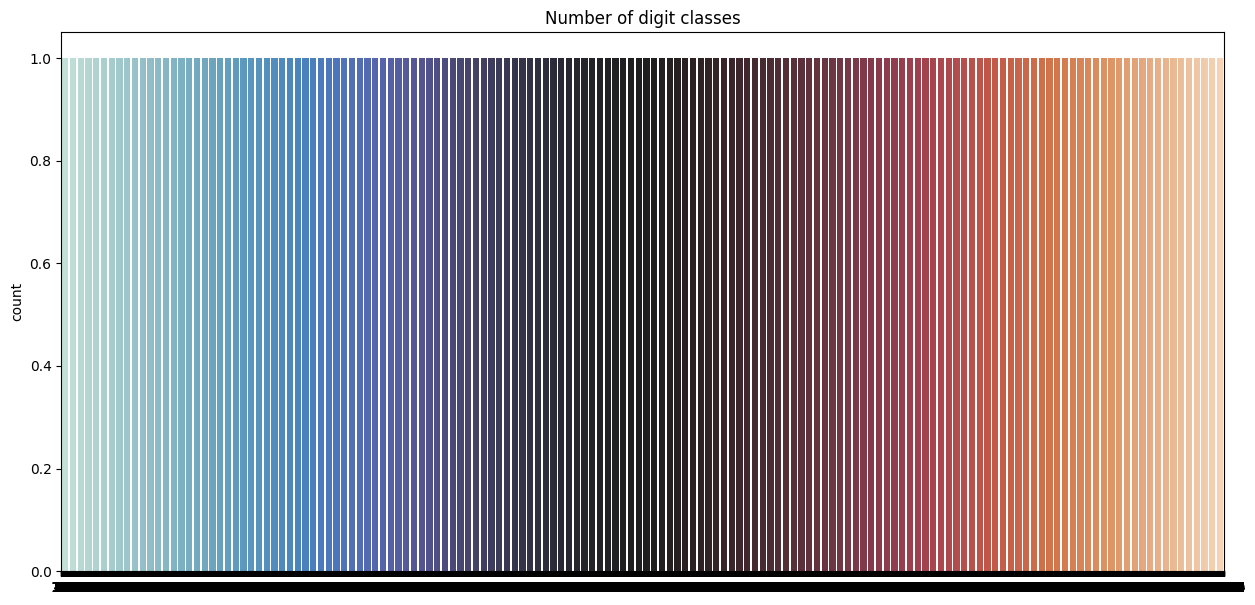

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

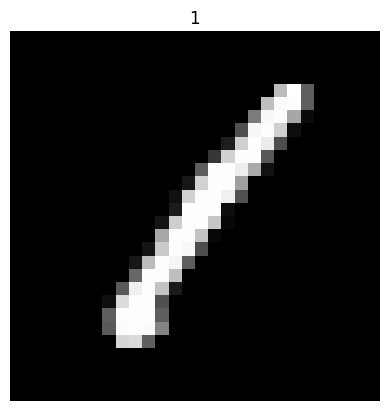

In [ ]:
# plot some samples
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

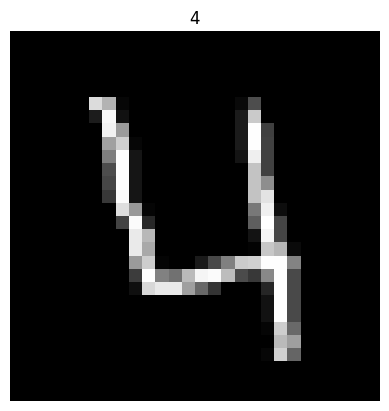

In [ ]:
# plot some samples
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalization, Reshape and Label Encoding
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28)
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
* Label Encoding  
    * Encode labels to one hot vectors
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
# Separate features and labels in train data
X_train = train.drop(labels=["label"], axis=1)
Y_train = train["label"]

# Reshape train and test data
x_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
test = test / 255.0

# Verify shapes
print(f"x_train shape: {x_train.shape}")
print(f"test shape: {test.shape}")


x_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [ ]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the train and the validation set for the fitting

x_train, x_test, y_train, y_test = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Print the shapes of the resulting datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (37800, 784)
x_test shape: (4200, 784)
y_train shape: (37800, 10)
y_test shape: (4200, 10)


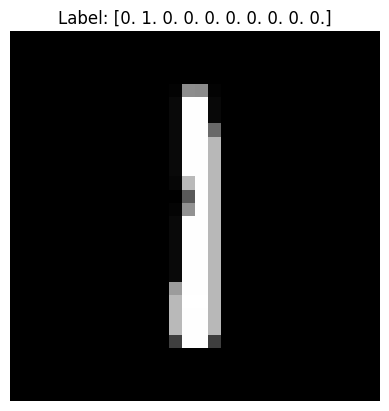

In [ ]:
# If X_train is a DataFrame, use .iloc and reshape if necessary
sample_image = X_train.iloc[2].values.reshape(28, 28)

# Plot the sample
plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {Y_train[2]}")
plt.axis('off')
plt.show()


<a id="4"></a>
## Convolutional Neural Network
* CNN is used for image classification, object detection
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [ ]:
#
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [ ]:
# Define the optimizer
from tensorflow.keras.optimizers import Adam

# Define the Adam optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)  # You can change 0.001 to any learning rate you want

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the Adam optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)  # You can change 0.001 to any learning rate you want

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [ ]:
epochs = 20
batch_size = 64

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [ ]:
# data augmentation
X_train = X_train.values.reshape(-1, 28, 28, 1)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

<a id="16"></a>
### Fit the model

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Fit the model
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)


Epoch 1/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.1974 - loss: 13.9550 - val_accuracy: 0.6543 - val_loss: 1.3125
Epoch 2/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3125 - loss: 1.8223 - val_accuracy: 0.6552 - val_loss: 1.3158
Epoch 3/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.4049 - loss: 1.6824 - val_accuracy: 0.8324 - val_loss: 0.5025
Epoch 4/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.3378 - val_accuracy: 0.8340 - val_loss: 0.5038
Epoch 5/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.6411 - loss: 1.0382 - val_accuracy: 0.9281 - val_loss: 0.2527
Epoch 6/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7812 - loss: 0.6549 - val_accuracy: 0.9286 - val_loss: 0.2514
Epoch 7/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 79s 65ms/step - accuracy: 0.7599 - loss: 0.7166 - val_accuracy: 0.9621 - val_loss: 0.1456
Epoch 8/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.4520 - val_acc

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6408 - loss: 1.0600 - val_accuracy: 0.9701 - val_loss: 0.1037
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9701 - val_loss: 0.1037
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.9089 - loss: 0.2894 - val_accuracy: 0.9769 - val_loss: 0.0791
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9769 - val_loss: 0.0791
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9330 - loss: 0.2185 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9433 - loss: 0.1802 - val_accuracy: 0.9843 - val_loss: 0.0520
Epoch 8/10
750/750 ━━

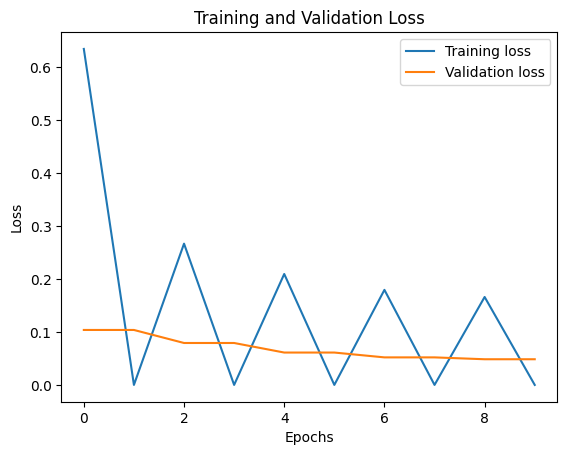

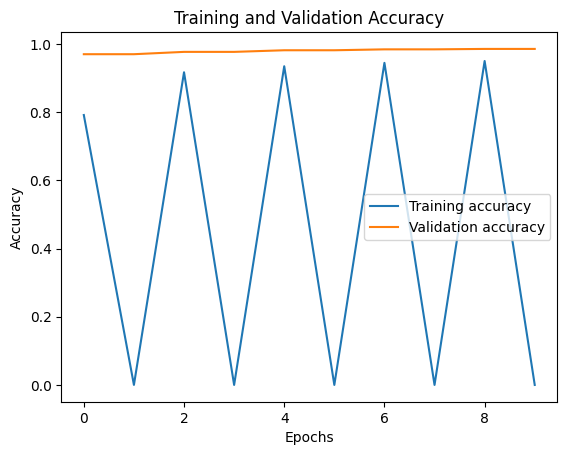

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


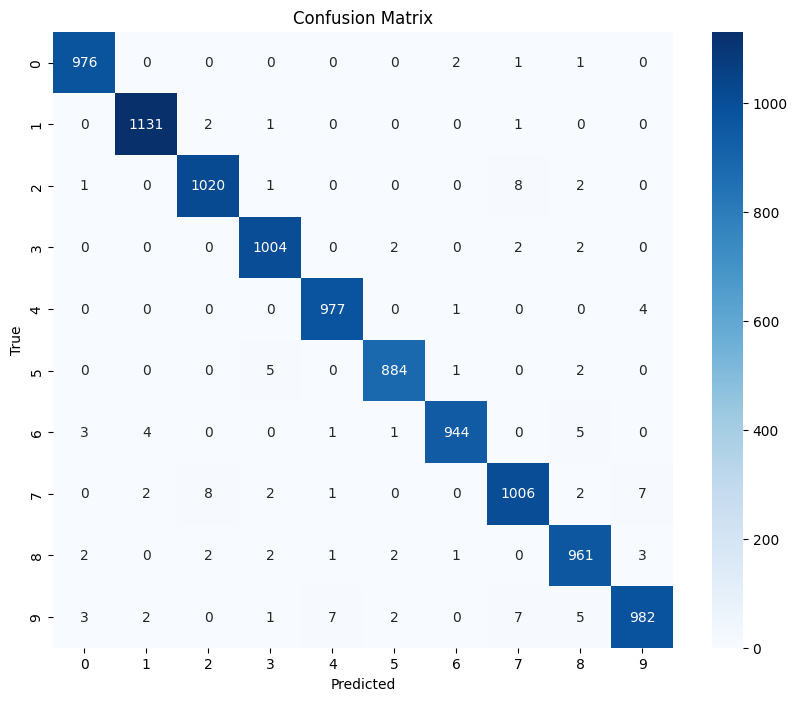

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 2. Preprocess the data
# Normalize the data to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to match the model input (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# 3. Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# 4. Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# Fit the data generator on the training data
datagen.fit(X_train)

# 5. Define the CNN model
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile the model
optimizer = Adam(learning_rate=0.001)  # Set the optimizer with learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Fit the model
batch_size = 64
epochs = 10

history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

# 8. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# 9. Plot the loss and accuracy curves for training and validation
history_dict = history.history

# Loss curve
plt.plot(history_dict['loss'], label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy curve
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 10. Confusion Matrix
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


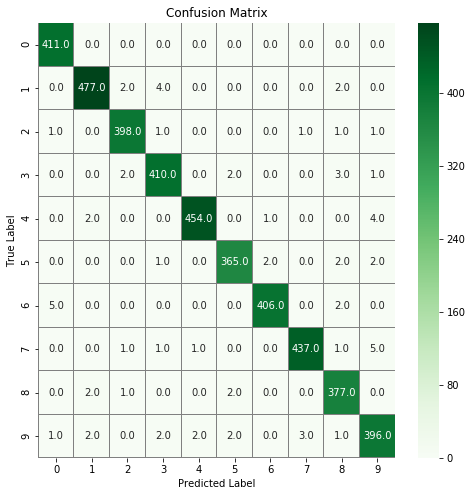

In [ ]:
# confusion matrix

# Predict the values from the validation dataset

# Convert predictions classes to one hot vectors

# Convert validation observations to one hot vectors

# compute the confusion matrix

# plot the confusion matrix
